### Manipulando matrices y data frames

Todos los funcionales mencionados funcionan con estructuras de entrada de una dimensión. Los siguientes funcionales  proporcionan herramientas útiles para trabajar con estructuras de datos de dimensiones superiores. La función `apply()` es una variante de `sapply()` que funciona con matrices. 

In [1]:
help(apply)

#### Función apply

La función `apply` aplica una función sobre un margen o dimensión dado de una matriz dada. Tiene `4` argumentos dados:

* `X`, la matriz de  resumen del problema.

* `MARGIN`, un vector entero de las dimensiones  `1` = filas, `2` = columnas, etc.
 
* `FUN`, una función de resumen.
 
* `...` otros  argumentos pasados a  `FUN`.


In [2]:
# Ejemplo

a <- matrix(1:20, nrow = 5)
apply(a, 1, mean)

[1]  8.5  9.5 10.5 11.5 12.5

In [3]:
apply(a, 2, mean)

[1]  3  8 13 18

Para crear una matriz que muestra el valor máximo y mínimo para cada columna, ejecutamos el siguiente código:

In [4]:
mat1 <- matrix(1:16, nrow = 4)
apply(mat1, 2, function(col) c(min = min(col), max = max(col)))

min,1,5,9,13
max,4,8,12,16


Para crear una matriz que muestra el valor máximo y mínimo para cada fila, ejecutamos el siguiente código:

In [5]:
apply(mat1, 1, function(col) c(min = min(col), max = max(col)))

min,1,2,3,4
max,13,14,15,16


Hay algunas advertencias al uso de `apply()`. No tiene un argumento simplificado, por lo que nunca puede estar completamente seguro de qué tipo de salida se obtendrá. Esto significa que `apply()` no es seguro para usar dentro de una función a menos que se compruebe cuidadosamente las entradas. `apply()` tampoco es idempotente en el sentido de que si la función de resumen es el operador  identidad, la salida no es siempre la misma que la entrada:

In [6]:
a1 <- apply(a, 1, identity)
identical(a, a1)

[1] FALSE

In [7]:
identical(a, t(a1))

[1] TRUE

In [8]:
a2 <- apply(a, 2, identity)
identical(a, a2)

[1] TRUE

La  función `outer()` es un poco diferente en que toma múltiples entradas de vector y crea como  salida una  matriz donde la función de entrada se ejecuta sobre cada combinación de las entradas:

In [9]:
help(outer)

In [10]:
outer(1:3, 1:10, "*")

1,2,3,4,5,6,7,8,9,10
2,4,6,8,10,12,14,16,18,20
3,6,9,12,15,18,21,24,27,30


In [11]:
# Ejemplo

x = 1:9; y = 2:8
names(x)=x; names(y)=y
outer(y,x,"^")

,1,2,3,4,5,6,7,8,9
2,2,4,8,16,32,64,128,256,512
3,3,9,27,81,243,729,2187,6561,19683
4,4,16,64,256,1024,4096,16384,65536,262144
5,5,25,125,625,3125,15625,78125,390625,1953125
6,6,36,216,1296,7776,46656,279936,1679616,10077696
7,7,49,343,2401,16807,117649,823543,5764801,40353607
8,8,64,512,4096,32768,262144,2097152,16777216,134217728


R tiene una función  para aplicar valores diferentes a los datos en diferentes columnas o filas. Por ejemplo, si se desea restar `3`, `4`, `5`, `6` de cada valor de la primera, segunda, tercera y última columna,  se puede  hacer  con la función `sweep()`: 

In [12]:
help(sweep)

In [13]:
a3<-matrix(seq(1,12),ncol=4,nrow=3,byrow=TRUE)
sweep(a3, 2, c(3,4,5,6), "-")


-2,-2,-2,-2
2,2,2,2
6,6,6,6


In [14]:
# El siguiente ejemplo, escala las filas de una matriz de manera que todos los valores estén entre 0 y 1.

a4 <- matrix(rnorm(20, 0, 10), nrow = 4)
a5 <- sweep(a4, 1, apply(a4, 1, min), '-')
a6 <- sweep(a5, 1, apply(a5, 1, max), '/')


In [15]:
a5

2.210605,0.000000,3.82033,14.007489,1.990074
18.452615,31.732753,24.68292,12.291007,0.000000
13.588149,2.530448,0.00000,3.238313,10.281612
21.873306,0.000000,22.75179,34.878810,26.425399


In [16]:
a6

0.1578160,0.0000000,0.2727348,1.0000000,0.1420721
0.5815006,1.0000000,0.7778375,0.3873287,0.0000000
1.0000000,0.1862246,0.0000000,0.2383189,0.7566602
0.6271231,0.0000000,0.6523098,1.0000000,0.7576348


En resumen, la función `sweep()` devuelve una matriz obtenida de una matriz de entrada barriendo un resumen  estadístico.

In [17]:
Producto <- c("A", "B", "C", "Total")
Continente <- c("Africa", "America", "Asia", "Australia", "Europa")
valores <- c(0.4, 0.2, 0.4, 0.1, 0.3, 0.4, 0.3, 0.4, 0.5, 0.2, 
            0.3, 0.2, 0.4, 0.3, 0.3, 0.1, 0.4, 0.4, 0.2, 0.2)

mat2 <- matrix(valores, ncol=5, dimnames=list(Producto, Continente))

swept.mat2 <- sweep(mat2[1:3,], 2, mat2[4,], "*")
swept.mat2

,Africa,America,Asia,Australia,Europa
A,0.04,0.12,0.10,0.04,0.08
B,0.02,0.16,0.04,0.03,0.08
C,0.04,0.12,0.06,0.03,0.04


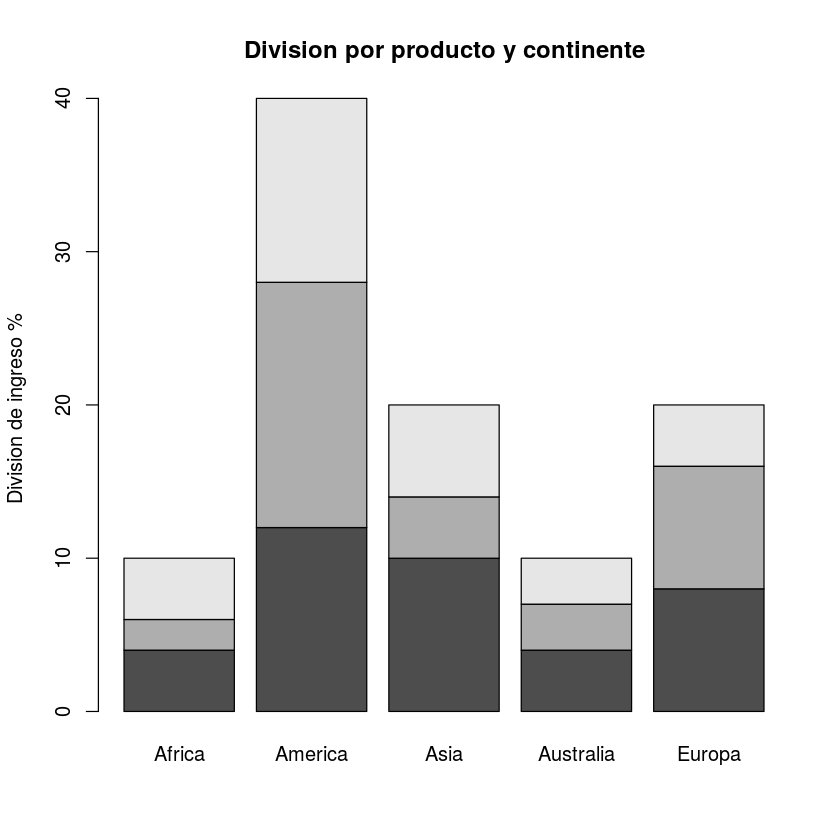

In [18]:
barplot(swept.mat2*100, legend=dimnames(swept.mat2)[["Producto"]],
       main="Division por producto y continente",
       ylab="Division de ingreso %") 

#### Función tapply

Se puede pensar en `tapply()` como una generalización de  `apply()` que permite matrices "irregulares", matrices donde cada fila puede tener un número diferente de columnas. Esto suele ser necesario cuando se intenta resumir un conjunto de datos. Por ejemplo, imagine que ha recopilado datos de frecuencia de pulso de un ensayo médico y desea comparar los dos grupos:

In [19]:
pulso <- round(rnorm(22, 70, 10 / 3)) + rep(c(0, 5), c(10, 12))
grupo <- rep(c("A", "B"), c(10, 12))

tapply(pulso, grupo, length)

A  B 
10 12

In [20]:
tapply(pulso, grupo, mean)

A    B 
70.0 74.5

`tapply()` trabaja creando una estructura de datos "desigual" a partir de un conjunto de entradas y luego aplicando una función a los elementos individuales de esa estructura. La primera tarea es realmente lo que hace la función `split()`. Requiere dos entradas y devuelve una lista que agrupa elementos del primer vector de acuerdo a elementos o categorías del segundo vector:

In [21]:
split(pulso, grupo)

$A
 [1] 73 72 73 73 64 68 68 71 64 74

$B
 [1] 78 70 76 72 75 77 76 71 75 71 76 77

Entonces `tapply()` es sólo la combinación de `split()` y `sapply()`:

In [22]:
tapply2 <- function(x, group, f, ..., simplify = TRUE) {
  pieces <- split(x, group)
  sapply(pieces, f, simplify = simplify)
}
tapply2(pulso, grupo, length)

A  B 
10 12

In [23]:
tapply2(pulso, grupo, mean)

A    B 
70.0 74.5

Un problema muy común al trabajar los datos es cómo calcular alguna estadística de una variable que se ha dividido en grupos. Aquí hay anotaciones  en un  clásico juego de ordenador :

In [24]:
(notas_juego <- data.frame(
    jugador = rep(c("Tom", "Dick", "Harry"), times = c(2, 5, 3)),
    anotaciones = round(rlnorm(10, 8), -1)
))

jugador,anotaciones
Tom,8780
Tom,2330
Dick,4230
Dick,4540
Dick,1660
Dick,1980
Dick,520
Harry,4780
Harry,8420
Harry,5080


Si queremos calcular la puntuación media de cada jugador, hay tres pasos. Primero, dividimos  (con `split` ) el conjunto de datos por jugador:

In [25]:
(anotaciones_por_jugador <- with(
    notas_juego,
    split(anotaciones, jugador
         )
))

$Dick
[1] 4230 4540 1660 1980  520

$Harry
[1] 4780 8420 5080

$Tom
[1] 8780 2330

A continuación se aplica (con `apply`)  la función `mean()` a cada elemento:

In [26]:
(lista_de_promedio_por_jugador <- lapply(anotaciones_por_jugador, mean))

$Dick
[1] 2586

$Harry
[1] 6093.333

$Tom
[1] 5555

Finalmente, combinamos  el resultado en un solo vector:

In [27]:
(promedio_por_jugador <- unlist(lista_de_promedio_por_jugador))

Dick    Harry      Tom 
2586.000 6093.333 5555.000

Los dos últimos pasos se pueden condensar en uno usando `vapply` o `sapply`, pero `divide-aplica-combina` es una tarea tan común que necesitamos algo más fácil. La función `tapply`, realiza los tres pasos de una sola vez:

In [28]:
with(notas_juego, tapply(anotaciones, jugador, mean))

Dick    Harry      Tom 
2586.000 6093.333 5555.000

Hay algunas otras funciones envoltura para `tapply`, como `aggregate`. Estas funciones realizan las misma cosas con una interfaz ligeramente diferente.

In [29]:
help(aggregate)

In [30]:
#Ejemplo
valores <- data.frame(datos = c("a", "a", "a", "a", "a", 
                               "b", "b", "b", 
                               "c", "c", "c", "c"))
nr.de.apariciones <- aggregate(x = valores,  by = list(valores1 = valores1$datos), 
                               FUN = length)

nr.de.apariciones

ERROR: Error in aggregate.data.frame(x = valores, by = list(valores1 = valores1$datos), : objeto 'valores1' no encontrado


In [31]:
# Conjunto de datos agregados mtcars por cyl y vs, retornando la media
# para variables numéricas

attach(mtcars)
aggdata <-aggregate(mtcars, by=list(cyl,vs), FUN=mean, na.rm=TRUE)
print(aggdata)
detach(mtcars)

  Group.1 Group.2      mpg cyl   disp       hp     drat       wt     qsec vs
1       4       0 26.00000   4 120.30  91.0000 4.430000 2.140000 16.70000  0
2       6       0 20.56667   6 155.00 131.6667 3.806667 2.755000 16.32667  0
3       8       0 15.10000   8 353.10 209.2143 3.229286 3.999214 16.77214  0
4       4       1 26.73000   4 103.62  81.8000 4.035000 2.300300 19.38100  1
5       6       1 19.12500   6 204.55 115.2500 3.420000 3.388750 19.21500  1
         am     gear     carb
1 1.0000000 5.000000 2.000000
2 1.0000000 4.333333 4.666667
3 0.1428571 3.285714 3.500000
4 0.7000000 4.000000 1.500000
5 0.0000000 3.500000 2.500000


### El paquete plyr

La familia   e funciones `*apply` de funciones tienen tres inconvenientes que les impiden ser fáciles de usar. En primer lugar, sus nombres son un poco oscuros.

El `l` en `lapply` para las listas tiene sentido, pero no sé sabe que significa la `t` en `tapply`. En segundo lugar, los argumentos no son totalmente coherentes. La mayoría de las funciones toman primero un objeto de datos y un segundo de una función, pero `mapply` intercambia el orden, y `tapply` toma la función como su tercer argumento. El argumento de datos es a veces `X` ya veces `object`, y el argumento de simplificación a veces es `simplify` y a veces `SIMPLIFY`.

En tercer lugar, la forma de la salida no es tan controlable como podría ser. Conseguir  resultados como data frames  o descartar el resultado requiere un poco de esfuerzo. Aquí es donde el paquete `plyr` es muy útil. El paquete contiene un conjunto de funciones denominadas `**ply`, donde los espacios en blanco (asteriscos) indican la forma de la entrada y la salida, respectivamente. Por lo tanto, `llply` toma una  lista como una entrada, aplica una función a cada elemento y devuelve una lista, lo que es un reemplazo para `lapply`:

In [32]:
# De un ejemplo anterior

primo_factores <- list(
    dos = 2,
    tres = 3,
    cuatro = c(2, 2),
    cinco = 5,
    seis= c(2, 3),
    siete = 7,
    ocho = c(2, 2, 2),
    nueve = c(3, 3),
    diez = c(2, 5)
)

In [33]:
library(plyr)
llply(primo_factores, unique)

$dos
[1] 2

$tres
[1] 3

$cuatro
[1] 2

$cinco
[1] 5

$seis
[1] 2 3

$siete
[1] 7

$ocho
[1] 2

$nueve
[1] 3

$diez
[1] 2 5

`laply` toma una lista y devuelve una matriz, imitando `sapply`. En el caso de una entrada vacía, hace lo inteligente y devuelve un vector lógico vacío (a diferencia de `sapply`, que devuelve una lista vacía):

In [34]:
laply(primo_factores, length)

[1] 1 1 2 1 2 1 3 2 2

In [35]:
laply(list(), length)
## logical(0)

logical(0)

`raply` sustituye `replicate`, pero también se tiene   las funciones `rlply` y `rdply`, que devuelven el resultado en forma de  una lista o un data frame y una función `r_ply` que descarta el resultado:

In [36]:
raply(5, runif(1)) 

[1] 0.2582624 0.9490462 0.6730478 0.8368967 0.8974885

In [37]:
rlply(5, runif(1)) # salida lista

[[1]]
[1] 0.05112192

[[2]]
[1] 0.5875493

[[3]]
[1] 0.4156003

[[4]]
[1] 0.01091262

[[5]]
[1] 0.1796247

In [38]:
rdply(5, runif(1)) # salida data frame

.n,V1
1,0.5239112
2,0.5612533
3,0.6948799
4,0.7699146
5,0.6918831


In [39]:
r_ply(5, runif(1)) # salida descartada

Tal vez la función más comúnmente utilizada en `plyr` es `ddply`, que toma data frames como entradas y salidas y puede ser utilizado como un reemplazo para `tapply`. Su gran fortaleza es que hace que sea fácil hacer cálculos en varias columnas a la vez. Añadamos una columna `level` al conjunto `notas_juego`, que indica el nivel alcanzado por el jugador en el juego:

In [40]:
notas_juego$level <- floor(log(notas_juego$anotaciones))

Hay varias maneras de llamar `ddply`. Todos los métodos toman un data frame, el nombre de las columnas a dividir  y la función a aplicar a cada parte. La columna se pasa sin comillas, pero envuelta en una llamada a la  función `.` . Para la función se puede usar `colwise` para decirle a `ddply` que llame a la función en cada columna, o usar `summarize` y especifique las manipulaciones de columnas específicas:

In [41]:
ddply(
    notas_juego,
    .(jugador),
    colwise(mean) 
)

jugador,anotaciones,level
Dick,2586.000,7.200000
Harry,6093.333,8.333333
Tom,5555.000,8.000000


In [42]:
ddply(
    notas_juego,
    .(jugador),
    summarize,
    promedio_anotaciones = mean(anotaciones), 
    max_nivel = max(level)
)

jugador,promedio_anotaciones,max_nivel
Dick,2586.000,8
Harry,6093.333,9
Tom,5555.000,9


`colwise` es más rápido de especificar, pero se tiene que hacer lo mismo con cada columna, mientras que `summarize` es más flexible, pero requiere más código. No hay reemplazo directo para `mapply`, aunque las funciones `m*ply` permiten bucle con múltiples argumentos. Del mismo modo, no hay reemplazo para `vapply` o `rapply`.

Por lo tanto, `ddply` significa: tomar un data frame, dividirlo, hacer algo y devolver un data frame. `ldply` significa,  tomar una lista, dividirla, hacer algo y devolver un data frame. Esto se extiende a todas las combinaciones.

Tomemos un ejemplo simple. Sea un data frame, lo dividiremos por años, calcularemos el coeficiente de variación del recuento y devolveremos un data frame. Esto podría hacerse fácilmente en una línea, pero se está ampliando aquí para mostrar el formato que podría tomar una función más compleja.

In [43]:
set.seed(1)
a7 <- data.frame(fechas = rep(2000:2002, each = 3), 
                 recuento = round(runif(9, 0, 20)))
print(a7)

  fechas recuento
1   2000        5
2   2000        7
3   2000       11
4   2001       18
5   2001        4
6   2001       18
7   2002       19
8   2002       13
9   2002       13


In [44]:
ddply(a7, "fechas", function(x) {
    media.recuento <- mean(x$recuento)
    sd.recuento <- sd(x$recuento)
    cv <- sd.recuento/media.recuento
    data.frame(cv.recuento = cv)
})

fechas,cv.recuento
2000,0.3984848
2001,0.6062178
2002,0.2309401


A menudo es conveniente utilizar algunas funciones dentro de una de las funciones `**ply`. `transform` actúa como normalmente sería la función base de R y modifica un data frame existente.  `summarise` crea un nuevo marco condensado de datos.

In [45]:
ddply(a7, "fechas", summarise, media.recuento = mean(recuento))

fechas,media.recuento
2000,7.666667
2001,13.333333
2002,15.000000


In [46]:
ddply(a7,  "fechas", transform, total.recuento = sum(recuento))



fechas,recuento,total.recuento
2000,5,23
2000,7,23
2000,11,23
2001,18,40
2001,4,40
2001,18,40
2002,19,45
2002,13,45
2002,13,45


`mutate` funciona como `transform`, pero le permite construir sobre columnas.

In [47]:
ddply(a7, "fechas", mutate, mu = mean(recuento), sigma = sd(recuento), cv = sigma/mu)

fechas,recuento,mu,sigma,cv
2000,5,7.666667,3.055050,0.3984848
2000,7,7.666667,3.055050,0.3984848
2000,11,7.666667,3.055050,0.3984848
2001,18,13.333333,8.082904,0.6062178
2001,4,13.333333,8.082904,0.6062178
2001,18,13.333333,8.082904,0.6062178
2002,19,15.000000,3.464102,0.2309401
2002,13,15.000000,3.464102,0.2309401
2002,13,15.000000,3.464102,0.2309401
